<a href="https://colab.research.google.com/github/AnushkaMishra29/tensorflow_flowers-dataset/blob/master/flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import platform
import datetime
import os
import math
import random

In [ ]:
splits = ("train[:80%]", "train[80%:90%]", "train[90%:]")
(raw_train, raw_validation, raw_test), metadata=tfds.load(name='tf_flowers',
    data_dir='tmp',
    with_info=True,  #gives info about data
    as_supervised=True, split=splits)  #returns the data and label as tuple

In [ ]:
print(raw_train);
print(raw_test);
print(raw_validation);


<DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


In [ ]:
num_raw_train=0
for example in raw_train:
  num_raw_train += 1
print(num_raw_train)
num_raw_validation=0
for example in raw_validation:
  num_raw_validation += 1
print(num_raw_validation)
num_raw_test=0
for example in raw_test:
  num_raw_test += 1
print(num_raw_test)

2936
367
367


In [ ]:
metadata

tfds.core.DatasetInfo(
    name='tf_flowers',
    version=3.0.0,
    description='A large set of images of flowers',
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    total_num_examples=3670,
    splits={
        'train': 3670,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
    redistribution_info=,
)

In [ ]:
train_eg=metadata.splits['train'].num_examples
num_class=metadata.features['label'].num_classes


In [ ]:
print(train_eg);
print(num_class)

3670
5


In [ ]:
orig_shape=metadata.features['image'].shape
orig_shape

(None, None, 3)

In [ ]:
reduced_size=150
input_image_size=reduced_size
input_image_shape=(reduced_size,reduced_size,3)

In [ ]:
print(input_image_size);
print(input_image_shape);

150
(150, 150, 3)


In [ ]:
get_label =metadata.features['label'].int2str


In [ ]:
print(get_label(0));
print(get_label(1));
print(get_label(2));
print(get_label(3));
print(get_label(4));

dandelion
daisy
tulips
sunflowers
roses


**data preprocessing**

In [ ]:
def preprocess(image,label):
  image=tf.cast(image,tf.float32)   #cast converts tensor to a new type here converts into float32
  image=image/255
  image=tf.image.resize(image,[input_image_size,input_image_size])
  return image,label

In [ ]:
dataset_train=raw_train.map(preprocess)
dataset_test=raw_test.map(preprocess)
dataset_validation=raw_validation.map(preprocess)

In [ ]:
(first_image,first_label)=list(dataset_train.take(1))[0]
print('Label:', first_label.numpy(), '\n')
print('Image shape:', first_image.numpy().shape, '\n')
print(first_image.numpy())

Label: 2 

Image shape: (150, 150, 3) 

[[[3.6479086e-01 4.7749674e-01 1.2319608e-01]
  [4.4974509e-01 5.2382356e-01 1.7350981e-01]
  [4.7001961e-01 5.4926151e-01 1.8336603e-01]
  ...
  [7.0983678e-01 2.0718623e-03 1.5619963e-03]
  [9.1464710e-01 7.0745103e-02 1.0331373e-01]
  [9.8225456e-01 3.3424130e-01 3.3130687e-01]]

 [[4.0965360e-01 5.1271242e-01 1.1365359e-01]
  [4.7321570e-01 5.3892159e-01 1.6445099e-01]
  [5.1032025e-01 5.6881046e-01 2.1275163e-01]
  ...
  [6.9081682e-01 3.6013271e-03 0.0000000e+00]
  [9.9307841e-01 2.1941178e-01 2.5537255e-01]
  [9.8577118e-01 2.9429463e-01 2.8927544e-01]]

 [[4.4826797e-01 5.3205884e-01 9.6437909e-02]
  [4.8078433e-01 5.3950983e-01 1.4245099e-01]
  [5.1856208e-01 5.7633990e-01 2.1032679e-01]
  ...
  [7.0454121e-01 9.3138376e-03 1.5685328e-03]
  [9.9401957e-01 2.8656864e-01 3.1784314e-01]
  [9.8300689e-01 2.4807300e-01 2.3679906e-01]]

 ...

 [[1.0068563e-01 2.1558763e-01 2.0256492e-03]
  [1.3078447e-01 2.3019637e-01 1.1666692e-02]
  [4.16667

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import os


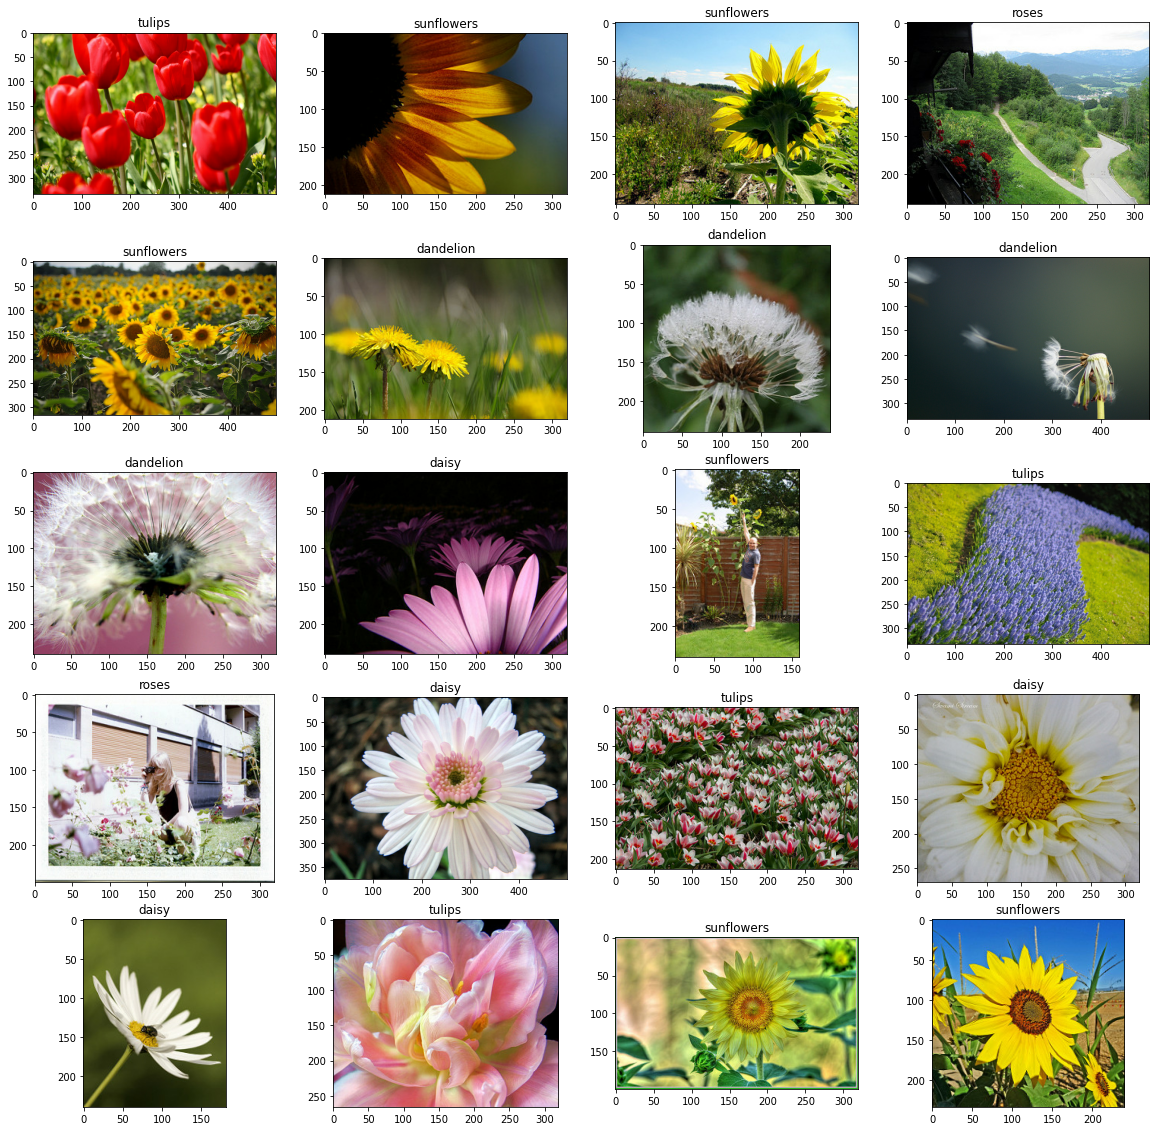

In [ ]:
def preview_dataset(dataset):
    plt.figure(figsize=(20,20))
    plot_index=0
    for features in dataset.take(20):
        (image, label) = features
        plot_index += 1
        plt.subplot(5, 4, plot_index)
        # plt.axis('Off')
        label = get_label(label.numpy())  #appending label to numpy array
        plt.title( label)
        plt.imshow(image.numpy())
preview_dataset(raw_train)

**data aug to prevent from overfitting**

In [ ]:
#flipping
def augment_flip(image: tf.Tensor) -> tf.Tensor:
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image
# change color
def augment_color(image: tf.Tensor) -> tf.Tensor:
    image = tf.image.random_hue(image, max_delta=0.08)
    image = tf.image.random_saturation(image, lower=0.7, upper=1.3)
    image = tf.image.random_brightness(image, 0.05)
    image = tf.image.random_contrast(image, lower=0.8, upper=1)
    image = tf.clip_by_value(image, clip_value_min=0, clip_value_max=1)
    return image
#rotate
def augment_rotation(image: tf.Tensor) -> tf.Tensor:
    # Rotate 0, 90, 180, 270 degrees
    return tf.image.rot90(
        image,
        tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    )
#invert
def augment_inversion(image: tf.Tensor) -> tf.Tensor:
    random = tf.random.uniform(shape=[], minval=0, maxval=1)
    if random > 0.5:
        image = tf.math.multiply(image, -1)
        image = tf.math.add(image, 1)
    return image
#zoom
def augment_zoom(image: tf.Tensor, min_zoom=0.8, max_zoom=1.0) -> tf.Tensor:
    image_width, image_height, image_colors = image.shape
    crop_size = (image_width, image_height)

    # Generate crop settings, ranging from a 1% to 20% crop.
    scales = list(np.arange(min_zoom, max_zoom, 0.01))
    boxes = np.zeros((len(scales), 4))

    for i, scale in enumerate(scales):
        x1 = y1 = 0.5 - (0.5 * scale)
        x2 = y2 = 0.5 + (0.5 * scale)
        boxes[i] = [x1, y1, x2, y2]

    def random_crop(img):
        # Create different crops for an image
        crops = tf.image.crop_and_resize(
            [img],
            boxes=boxes,
            box_indices=np.zeros(len(scales)),
            crop_size=crop_size
        )
        # Return a random crop
        return crops[tf.random.uniform(shape=[], minval=0, maxval=len(scales), dtype=tf.int32)]

    choice = tf.random.uniform(shape=[], minval=0., maxval=1., dtype=tf.float32)

    # Only apply cropping 50% of the time    
    return tf.cond(choice < 0.5, lambda: image, lambda: random_crop(image))

In [ ]:
def augment_data(image, label):
    image = augment_flip(image)
    image = augment_color(image)
    image = augment_rotation(image)
    image = augment_zoom(image)
    image = augment_inversion(image)
    return image, label

In [ ]:
dataset_train_augmented = dataset_train.map(augment_data)

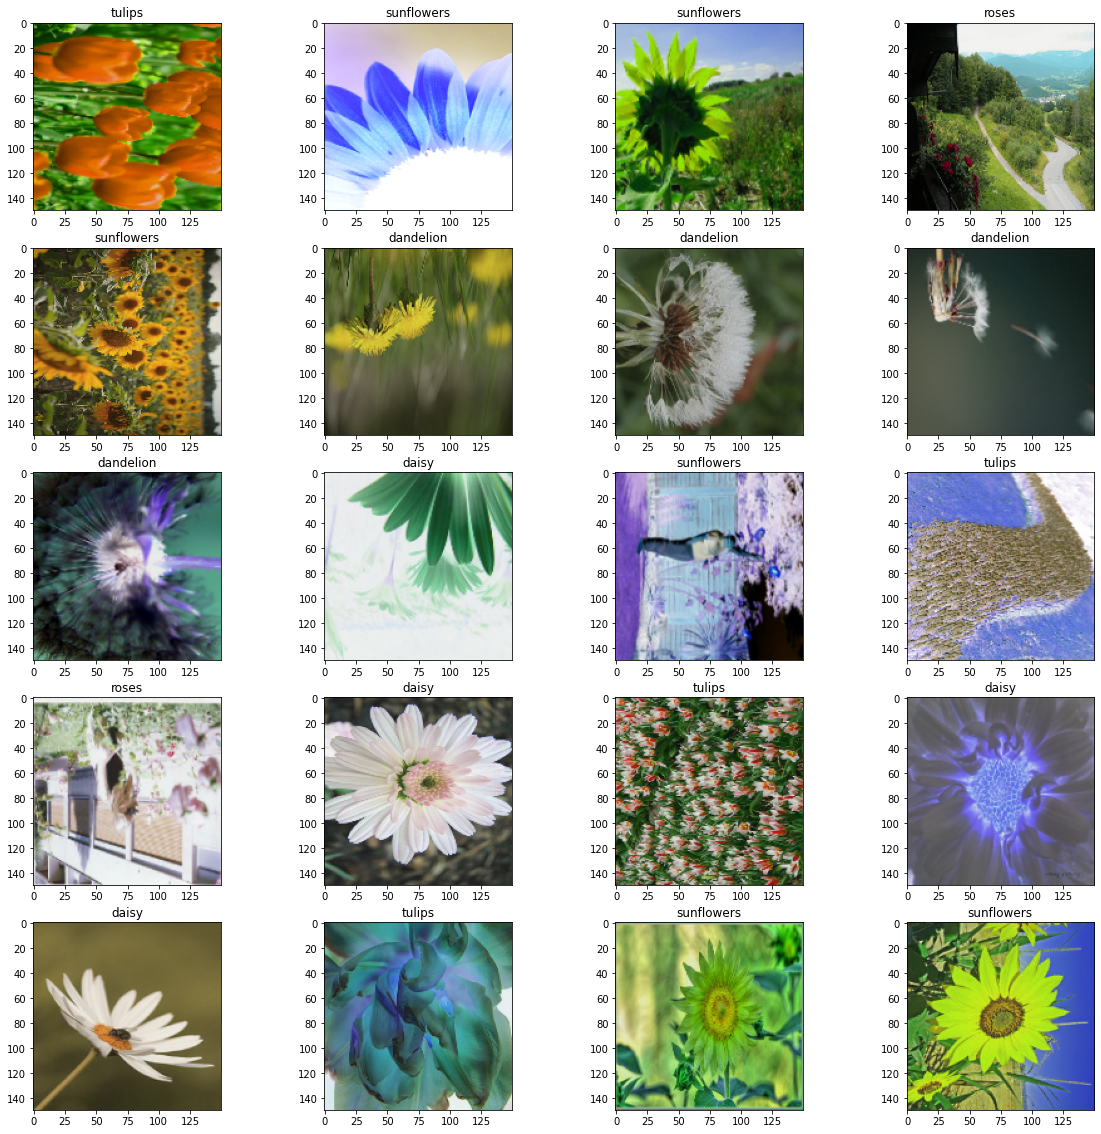

In [ ]:
preview_dataset(dataset_train_augmented)

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Convolution2D(input_shape=input_image_shape,filters=64,kernel_size=3,activation=tf.keras.activations.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.Convolution2D(filters=64,kernel_size=3,strides=(2,2),activation=tf.keras.activations.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.Convolution2D(filters=128,kernel_size=3,activation=tf.keras.activations.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.Convolution2D(filters=128,kernel_size=3,activation=tf.keras.activations.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(1,1)))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
# 512 neuron dense layer.
model.add(tf.keras.layers.Dense(units=512,activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=num_class,activation=tf.keras.activations.softmax))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 36, 36, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 128)        

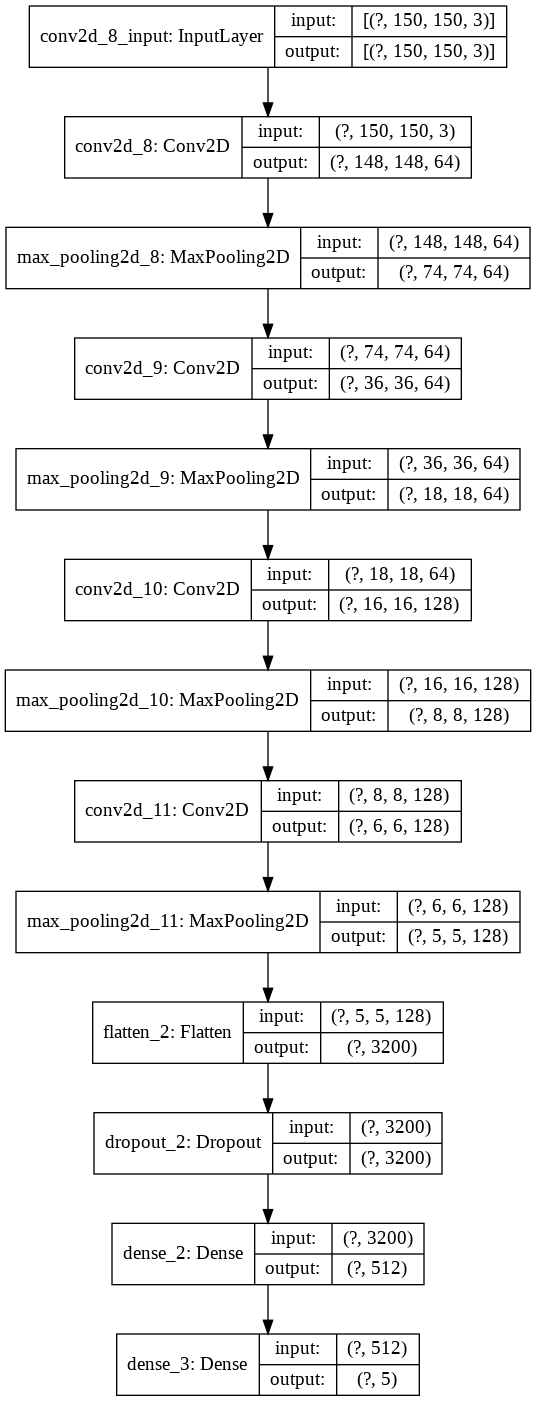

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)

In [ ]:
BATCH_SIZE = 32

train_batches = raw_train.shuffle(num_raw_train//4).map(preprocess).batch(BATCH_SIZE).prefetch(1)

validation_batches = dataset_validation.batch(BATCH_SIZE).prefetch(1)

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

EPOCHS = 15

history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/15
92/92 [==============================] - 8s 87ms/step - loss: 0.8671 - accuracy: 0.6686 - val_loss: 0.9111 - val_accuracy: 0.6649
Epoch 2/15
92/92 [==============================] - 8s 85ms/step - loss: 0.8103 - accuracy: 0.6911 - val_loss: 0.7634 - val_accuracy: 0.6975
Epoch 3/15
92/92 [==============================] - 8s 85ms/step - loss: 0.7490 - accuracy: 0.7153 - val_loss: 0.7289 - val_accuracy: 0.7221
Epoch 4/15
92/92 [==============================] - 8s 86ms/step - loss: 0.6867 - accuracy: 0.7459 - val_loss: 0.7329 - val_accuracy: 0.7112
Epoch 5/15
92/92 [==============================] - 8s 84ms/step - loss: 0.6333 - accuracy: 0.7619 - val_loss: 0.7186 - val_accuracy: 0.7166
Epoch 6/15
92/92 [==============================] - 8s 84ms/step - loss: 0.6063 - accuracy: 0.7674 - val_loss: 0.6741 - val_accuracy: 0.7629
Epoch 7/15
92/92 [==============================] - 8s 84ms/step - loss: 0.5533 - accuracy: 0.7994 - val_loss: 0.7488 - val_accuracy: 0.7030
Epoch 8/15
92

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

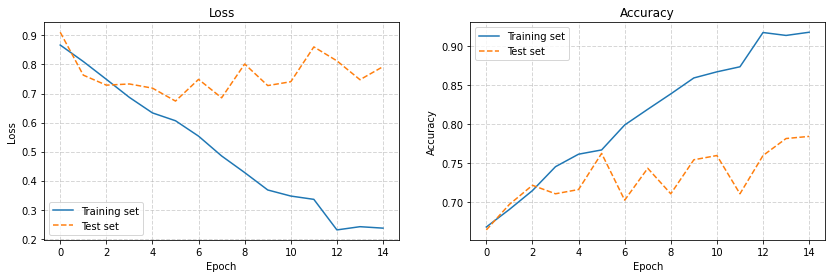

In [ ]:
render_training_history(history)

In [ ]:
model.save()

NameError: ignored